<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/2%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# workflow

- ingestion
- *selection*
- *analyze*



In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('sample_data/daegu.csv')    #내가 원하는 형태로 잘 안불러짐 <- tidy data

<ipython-input-3-748d7b909e0a>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('sample_data/daegu.csv')    #내가 원하는 형태로 잘 안불러짐 <- tidy data


In [4]:
data

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0034750,더벤티대구,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,2714010100104980007000001,NaN,대구광역시 동구 신암로 120,701818,41200,NaN,1,NaN,128.612479,35.880497
1,MA0101202210A0003881,엉클몽키테니스,NaN,R1,예술·스포츠,R103,스포츠 서비스,R10312,테니스장,R91199,...,2729011500114450004013792,NaN,대구광역시 달서구 상원로11길 36,704817,42790,NaN,2,NaN,128.535589,35.813599
2,MA0101202210A0101134,무아브로우,NaN,S2,수리·개인,S207,이용·미용,S20702,피부 관리실,S96113,...,2711015600109170008015104,NaN,대구광역시 중구 명륜로23길 57,700802,41957,NaN,NaN,NaN,128.595289,35.862512
3,MA0101202210A0078919,베스트홀덤펍,NaN,I2,음식,I211,주점,I21103,생맥주 전문,I56213,...,2729011400105540000001917,NaN,대구광역시 달서구 용산로 14,704914,42695,NaN,2,NaN,128.530952,35.838586
4,MA0101202210A0055790,홍천뚝배기,NaN,I2,음식,I201,한식,I20102,국/탕/찌개류,I56111,...,2723011100113130000000002,NaN,대구광역시 북구 대동로6길 28,702842,41544,NaN,2,NaN,128.609366,35.894844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111467,MA0101202302A0072447,퍼스트커피,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,2771025626115920001000001,NaN,대구광역시 달성군 다사읍 세천남로 8,711814,42930,NaN,NaN,NaN,128.477188,35.873540
111468,MA0101202302A0041111,효자동설렁탕월드마크점,NaN,I2,음식,I201,한식,I20102,국/탕/찌개류,I56111,...,2729011300104610000000001,월드마크웨스트엔드,대구광역시 달서구 와룡로 169,704753,42688,NaN,NaN,NaN,128.536400,35.848747
111469,MA0101202302A0049422,리리푸드,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,2720010300103510001013596,NaN,대구광역시 남구 현충로 74,705803,42450,NaN,1,NaN,128.580294,35.839350
111470,MA0101202302A0079461,일월식당,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,2729012200100550003031321,NaN,대구광역시 달서구 구마로 216,704820,42736,NaN,NaN,NaN,128.551329,35.836701


In [5]:
data.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0034750,더벤티대구,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,2714010100104980007000001,NaN,대구광역시 동구 신암로 120,701818,41200,NaN,1,NaN,128.612479,35.880497
1,MA0101202210A0003881,엉클몽키테니스,NaN,R1,예술·스포츠,R103,스포츠 서비스,R10312,테니스장,R91199,...,2729011500114450004013792,NaN,대구광역시 달서구 상원로11길 36,704817,42790,NaN,2,NaN,128.535589,35.813599
2,MA0101202210A0101134,무아브로우,NaN,S2,수리·개인,S207,이용·미용,S20702,피부 관리실,S96113,...,2711015600109170008015104,NaN,대구광역시 중구 명륜로23길 57,700802,41957,NaN,NaN,NaN,128.595289,35.862512
3,MA0101202210A0078919,베스트홀덤펍,NaN,I2,음식,I211,주점,I21103,생맥주 전문,I56213,...,2729011400105540000001917,NaN,대구광역시 달서구 용산로 14,704914,42695,NaN,2,NaN,128.530952,35.838586
4,MA0101202210A0055790,홍천뚝배기,NaN,I2,음식,I201,한식,I20102,국/탕/찌개류,I56111,...,2723011100113130000000002,NaN,대구광역시 북구 대동로6길 28,702842,41544,NaN,2,NaN,128.609366,35.894844


In [6]:
data.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
111467,MA0101202302A0072447,퍼스트커피,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,2771025626115920001000001,NaN,대구광역시 달성군 다사읍 세천남로 8,711814,42930,NaN,NaN,NaN,128.477188,35.873540
111468,MA0101202302A0041111,효자동설렁탕월드마크점,NaN,I2,음식,I201,한식,I20102,국/탕/찌개류,I56111,...,2729011300104610000000001,월드마크웨스트엔드,대구광역시 달서구 와룡로 169,704753,42688,NaN,NaN,NaN,128.536400,35.848747
111469,MA0101202302A0049422,리리푸드,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,2720010300103510001013596,NaN,대구광역시 남구 현충로 74,705803,42450,NaN,1,NaN,128.580294,35.839350
111470,MA0101202302A0079461,일월식당,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,2729012200100550003031321,NaN,대구광역시 달서구 구마로 216,704820,42736,NaN,NaN,NaN,128.551329,35.836701
111471,MA0101202302A0053205,새나라부동산중개사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,2720010300121300031014638,NaN,대구광역시 남구 명덕로 110-2,705816,42402,NaN,NaN,NaN,128.582057,35.856421


In [7]:
data.sample(5)  #random 하게 불러오기

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
84928,MA010120220814111973,중국성,NaN,I2,음식,I202,중식,I20201,중국집,I56121,...,2723012600103290002045169,NaN,대구광역시 북구 태전로 87,702863,41454,NaN,NaN,NaN,128.541831,35.927633
65507,MA010120220811723294,몰리올리에스테틱,NaN,S2,수리·개인,S207,이용·미용,S20702,피부 관리실,S96113,...,2726010600112350008028816,NaN,대구광역시 수성구 달구벌대로 2269,706836,42007,NaN,2,NaN,128.610965,35.860694
13483,MA010120220808183375,주유소,NaN,I2,음식,I211,주점,I21104,요리 주점,I56219,...,2726010700108370003001998,청송빌딩,대구광역시 수성구 동대구로29길 22,706853,42147,NaN,1,NaN,128.623135,35.843912
82592,MA010120220813793439,이음수학학원,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,2723011200102010003008302,복현아이파크,대구광역시 북구 동북로 241,702022,41526,NaN,NaN,NaN,128.617577,35.896605
85581,MA010120220814047485,동원모텔,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,2723011000104170002008015,NaN,대구광역시 북구 대현로 66,702823,41571,NaN,NaN,NaN,128.606388,35.883494


In [9]:
range(10)

range(0, 10)

In [10]:
data.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [11]:
len(data.columns)

39

In [12]:
data.dtypes   #object => pandas에서 문자열 그리고 int64만 사용

상가업소번호        object
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지        float64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보          float64
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

In [8]:
data.info()  # => 지점명 건물명 null => missging 데이터 => 결측치

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111472 entries, 0 to 111471
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     111472 non-null  object 
 1   상호명        111472 non-null  object 
 2   지점명        260 non-null     object 
 3   상권업종대분류코드  111472 non-null  object 
 4   상권업종대분류명   111472 non-null  object 
 5   상권업종중분류코드  111472 non-null  object 
 6   상권업종중분류명   111472 non-null  object 
 7   상권업종소분류코드  111472 non-null  object 
 8   상권업종소분류명   111472 non-null  object 
 9   표준산업분류코드   111472 non-null  object 
 10  표준산업분류명    111472 non-null  object 
 11  시도코드       111472 non-null  int64  
 12  시도명        111472 non-null  object 
 13  시군구코드      111472 non-null  int64  
 14  시군구명       111472 non-null  object 
 15  행정동코드      111472 non-null  int64  
 16  행정동명       111472 non-null  object 
 17  법정동코드      111472 non-null  int64  
 18  법정동명       111472 non-null  object 
 19  지번코드       111472 non-n

In [13]:
None

In [14]:
1

1

In [15]:
import numpy as np

In [16]:
a = np.array([1,2,None,3])

In [18]:
a

array([1, 2, None, 3], dtype=object)

In [19]:
a.size

4

In [17]:
a.mean()  #None은 연산이 안됨

TypeError: ignored

In [25]:
a.count()

AttributeError: ignored

In [20]:
import numpy.ma as ma   #=>numpy중 masked array는 비어있는 원소(missing data, 결즉치)들을 처리할 수 있다 

In [22]:
aa = ma.array([1,2,4,None], mask=[False,False,False,True])

In [23]:
aa

masked_array(data=[1, 2, 4, --],
             mask=[False, False, False,  True],
       fill_value='?',
            dtype=object)

In [24]:
aa.count()

3

In [26]:
import seaborn as sns

In [28]:
mpg = sns.load_dataset('mpg')

In [29]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [33]:
 mpg.head()
 mpg.tail()
 mpg.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
391,36.0,4,135.0,84.0,2370,13.0,82,usa,dodge charger 2.2


In [32]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [36]:
mpg.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [35]:
mpg[mpg.horsepower==None]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [41]:
mpg[mpg.horsepower=='NaN']     #mask 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [42]:
mpg.horsepower.isnull().sum()

6

In [40]:
mpg.horsepower.isnull()   # => True, Fale 나오면 원본에 집어넣을 수 있다. 

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [38]:
mpg[mpg.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [39]:
mpg[mpg.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [43]:
!pip install -U missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import missingno as mino

<Axes: >

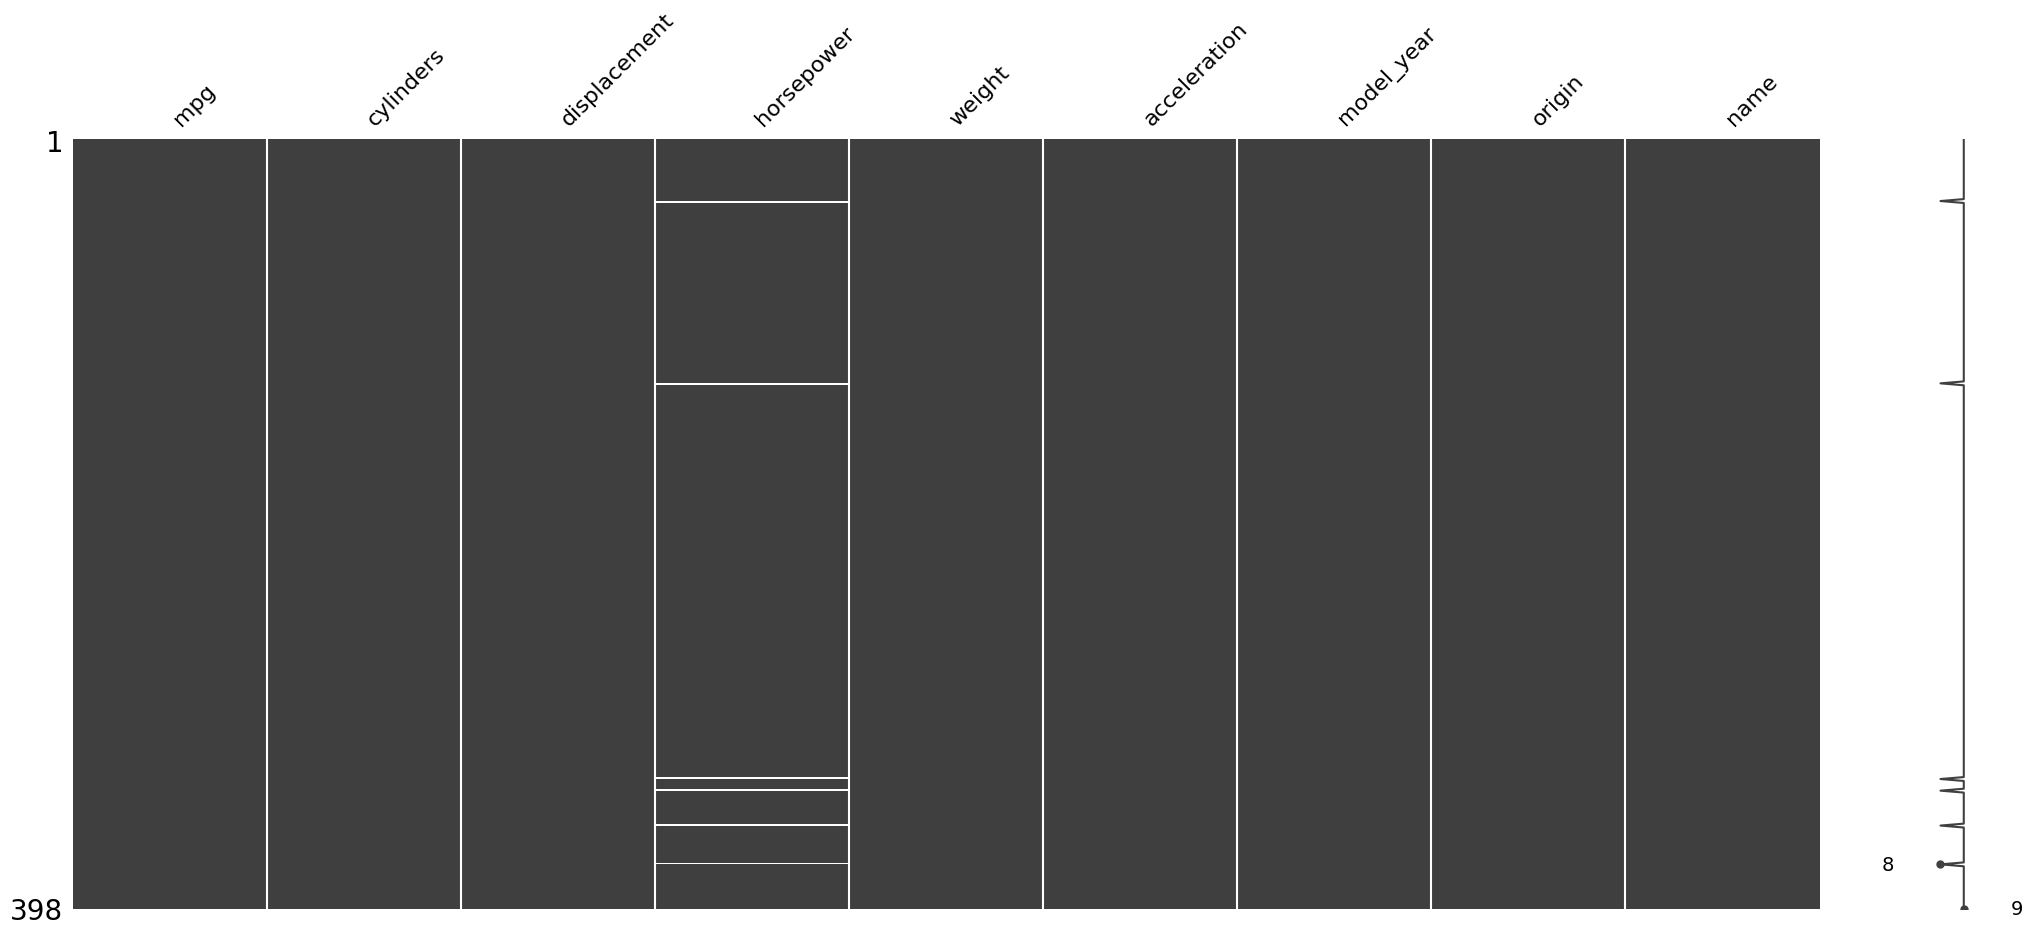

In [45]:
mino.matrix(mpg)

In [ ]:
# map, filter, reduce

In [37]:
list(filter(lambda x:x>2, [1,2,3]))

[3]

In [ ]:
## predicate => 참 또는 거짓 
#- callable(able이 붙으면 true/False)
#- *is*--